In [3]:
# import numpy as np 

# Avocadro = 6.02*(10**23) # molécules/mol
# rho_os = 1.85 # g/cm^3


# liste_composition = [0.063984, 0.278, 0.027, 0.410016, 0.002, 0.07, 0.002, 0.147]
# liste_masse_molaire_moléculaire = [1.0078, 12.001, 14.007, 15.999, 24.305, 30.974, 32.065, 40.078]
# liste_numéro_atomique_croissant = [1, 6, 7, 8, 12, 15, 16, 20]

# masse_molaire_moléculaire = 0
# for i in range (len(liste_composition)):
#     masse_molaire_moléculaire += liste_masse_molaire_moléculaire[i]*liste_composition[i]

# print(f'masse molaire moléculaire: {masse_molaire_moléculaire} g/mol')

import numpy as np 
import matplotlib.pyplot as plt

#electronic density of water
number_of_electron_in_water = 0.111984/1.0078*1*6.022*10**23 + 0.888106/15.999*8*6.022*10**23
print(f"Nombre d'électron dans un cm^3 d'eau : {number_of_electron_in_water}")

hydrogen_in_bone = (1.85*0.063984)/1.0078*1*6.022*10**23
carbon_in_bone = (1.85*0.278)/12.011*6*6.022*10**23
nitrogen_in_bone = (1.85*0.027)/14.007*7*6.022*10**23
oxygen_in_bone = (1.85*0.410016)/15.999*8*6.022*10**23
magnesium_in_bone = (1.85*0.002)/24.305*12*6.022*10**23
phosphorus_in_bone = (1.85*0.07)/30.974*15*6.022*10**23
sulfur_in_bone = (1.85*0.002)/32.065*16*6.022*10**23
calcium_in_bone = (1.85*0.147)/40.078*20*6.022*10**23

number_of_electron_in_bone = (hydrogen_in_bone + carbon_in_bone + nitrogen_in_bone  
                            + oxygen_in_bone + magnesium_in_bone + phosphorus_in_bone +
                            sulfur_in_bone + calcium_in_bone)

print(f"Nombre d'électron dans un cm^3 d'os compact : {number_of_electron_in_bone}")


Nombre d'électron dans un cm^3 d'eau : 3.3434025982218246e+23
Nombre d'électron dans un cm^3 d'os compact : 5.905878161754368e+23


S_col os = [-1.29455597e-15 -1.29394194e-15 -1.29332856e-15 ... -4.46590083e-16
 -4.46543675e-16 -4.46497281e-16]
S_col eau = [-7.28725455e-16 -7.28379757e-16 -7.28034418e-16 ... -2.51346559e-16
 -2.51320435e-16 -2.51294318e-16]


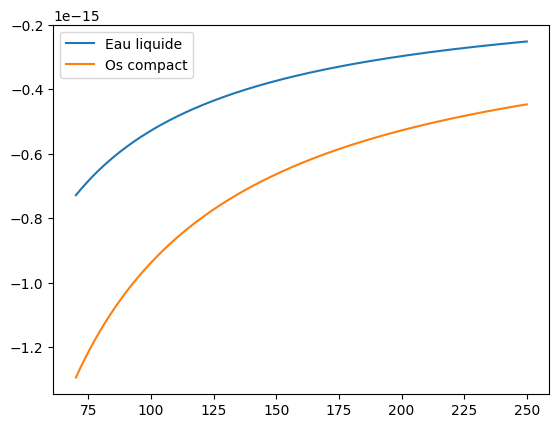

In [4]:
I_bone = 91.9 #eV
I_water = 75 #eV


r_e = 2.818 * 10**(-15) # m
m_e = 9.109 * 10**(-31) # kg
m_p = 1.672 * 10**(-27) # kg
C = 2.99792458e8  # m/s
ratio = m_e/m_p # -
M_PROTON_MEV = 938.2720813

E_proton = np.linspace(70, 250, 5000) #MeV




def energy_MeV_to_velocity(E_MeV):
    """
    E_MeV : scalaire ou array numpy (énergie cinétique en MeV)
    retourne v en m/s (même shape que E_MeV)
    """
    gamma = 1.0 + E_MeV / M_PROTON_MEV
    beta = np.sqrt(1.0 - 1.0 / gamma**2)
    return beta * C

# exemple avec un linspace d'énergie

vitesse_proton = energy_MeV_to_velocity(E_proton)      # m/s

betha = vitesse_proton/C 
gamma = 1 / (np.sqrt( 1 - betha**2 ))



T_eMax = ( (2 * m_e* C**2 * (gamma**2 - 1) ) /
        ( 1 + 2 * gamma * ratio + ratio**2 ) )


def S_col(I, n_e):
    ln = np.log( (2 * m_e * C**2 * betha**2 * gamma**2 *T_eMax) / I**2)
    #print(f'ln = {ln}')
    deux_betha_carré = 2 * betha**2
    #print(f'2betha^2 = {deux_betha_carré}')
    return ( 2 * np.pi * r_e**2 * m_e * C**2 * n_e * (1/betha**2) * 
            (ln - deux_betha_carré))

S_col_bone = S_col(I_bone, number_of_electron_in_bone)
S_col_water = S_col(I_water, number_of_electron_in_water)

print(f'S_col os = {S_col_bone}')
print(f'S_col eau = {S_col_water}')


plt.plot(E_proton, S_col_water, label='Eau liquide')
plt.plot(E_proton, S_col_bone, label='Os compact')
plt.legend()